In [ ]:
import tarfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import networkx as nx
import scipy.io as sio
import random

## Data Exploration

In [2]:
# importing the dataset
tar_path = '/Users/syednaqvi/university_data/Connectomics - Lab/Connectomics/Project/Datasets/rois_1000_beijing.tar'
extracted_path = '/Users/syednaqvi/university_data/Connectomics - Lab//Connectomics/Project/Datasets/extracted_rois_1000_beijing'

# Extract the tar file to check its contents
if not os.path.exists(extracted_path):
    with tarfile.open(tar_path) as tar_file:
        tar_file.extractall(extracted_path)

# Check the contents of the extracted folder
os.listdir(extracted_path)

['rois_1000_beijing']

In [3]:
# Further drill down into the folder to see the files
inner_folder = os.path.join(extracted_path, 'rois_1000_beijing')
os.listdir(inner_folder)

['rois',
 'logs',
 'Peking_1_phenotypic.csv',
 'Peking_3_phenotypic.csv',
 'Peking_2_phenotypic.csv']

In [4]:
# Check what's inside the 'rois' folder which likely contains the time course data
rois_folder = os.path.join(inner_folder, 'rois')
os.listdir(rois_folder)

['tseries_rois_X_1093743_run1.mat',
 'tseries_rois_X_2833684_run1.mat',
 'tseries_rois_X_1771270_run1.mat',
 'tseries_rois_X_2377207_run1.mat',
 'tseries_rois_X_7689953_run1.mat',
 'tseries_rois_X_1408093_run1.mat',
 'tseries_rois_X_3707771_run1.mat',
 'tseries_rois_X_4136226_run1.mat',
 'tseries_rois_X_4073815_run1.mat',
 'tseries_rois_X_7407032_run1.mat',
 'tseries_rois_X_4383707_run1.mat',
 'tseries_rois_X_4091983_run1.mat',
 'tseries_rois_X_2950754_run1.mat',
 'tseries_rois_X_1875711_run1.mat',
 'tseries_rois_X_4265987_run1.mat',
 'tseries_rois_X_1662160_run1.mat',
 'tseries_rois_X_2529026_run1.mat',
 'tseries_rois_X_3306863_run1.mat',
 'tseries_rois_X_4225073_run1.mat',
 'tseries_rois_X_7135128_run1.mat',
 'tseries_rois_X_1561488_run1.mat',
 'tseries_rois_X_2266806_run1.mat',
 'tseries_rois_X_2208591_run1.mat',
 'tseries_rois_X_2498847_run1.mat',
 'tseries_rois_X_2538839_run1.mat',
 'tseries_rois_X_9887336_run1.mat',
 'tseries_rois_X_2367157_run1.mat',
 'tseries_rois_X_4475709_run

In [5]:
# checking the phenotypic information from the first Peking site (as an example)
phenotypic_file = os.path.join(inner_folder, 'Peking_1_phenotypic.csv')
phenotypic_data = pd.read_csv(phenotypic_file)
phenotypic_data.head()

,ScanDir ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,Inattentive,...,Performance IQ,Full2 IQ,Full4 IQ,Med Status,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2
0,1056121,1,1,13.92,1,0,NaN,1,30.0,15.0,...,136,NaN,135,1,1,NaN,NaN,NaN,1,NaN
1,1113498,1,0,14.83,1,0,NaN,1,20.0,11.0,...,135,NaN,133,1,1,NaN,NaN,NaN,1,NaN
2,1133221,1,1,12.33,1,1,ODD,1,64.0,32.0,...,108,NaN,113,2,1,NaN,NaN,NaN,1,NaN
3,1139030,1,0,11.33,1,0,NaN,1,32.0,18.0,...,86,NaN,87,1,1,NaN,NaN,NaN,1,NaN
4,1186237,1,1,13.92,1,3,NaN,1,48.0,31.0,...,103,NaN,109,1,1,NaN,NaN,NaN,1,NaN


In [6]:
# Load one of the time series files (RAW data)
sample_file = os.path.join(rois_folder, 'tseries_rois_X_1050345_run1.mat')
mat_data = sio.loadmat(sample_file)

# Check the structure of the loaded data
mat_data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'tseries'])

In [7]:
# The key "tseries" seems to hold the time series data for the ROIs. Let's see.
time_series_data = mat_data['tseries']


# Check the shape of the data
time_series_data.shape, time_series_data[:10, :10]

((236, 954),
 array([[ 0.21378733, -0.7755515 , -0.39448023, -0.55172223, -0.55008161,
         -0.36723134,  0.33193356, -0.60797679, -0.54608178, -0.89663643],
        [ 0.96228153, -0.37762961,  0.09296375, -0.51731646,  0.19985496,
          0.1087102 ,  0.01068258,  0.5756042 ,  0.04721161, -0.28434849],
        [ 0.1902964 , -0.02527301,  0.04937493, -0.27590573, -0.00418421,
          0.05183056, -0.45824391, -0.15498589, -0.29058135, -0.01561638],
        [-0.00681005,  0.13924086,  0.46019566, -0.23587269,  0.67350984,
         -0.27889118, -0.25746652, -1.16330254, -0.19416572, -0.37346938],
        [-0.18063182, -0.03016479, -0.22158356, -0.10064978,  0.39047992,
         -0.43732488, -0.35676605, -0.52841026, -0.45996216, -0.05713009],
        [ 0.36442962,  0.43015975, -0.40955561,  0.4561556 ,  0.3875134 ,
         -0.03368982, -0.29254439, -0.6467371 ,  0.54737061,  0.07244685],
        [-0.10849317,  0.15925379, -0.14247668,  0.62408847, -0.09223806,
          0.1782152

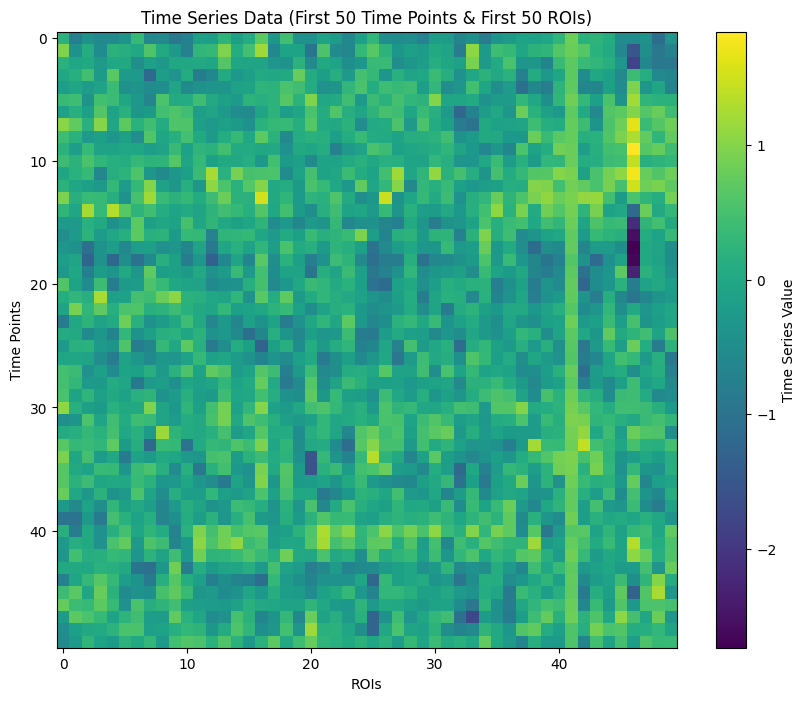

In [8]:
# Let's have a plot of the time series data for the first 50 ROIs
plt.figure(figsize=(10, 8))
plt.imshow(time_series_data[:50, :50], aspect='auto', cmap='viridis')
plt.colorbar(label='Time Series Value')
plt.title('Time Series Data (First 50 Time Points & First 50 ROIs)')
plt.xlabel('ROIs')
plt.ylabel('Time Points')
plt.show()

In the plot above, each column represents a specific ROI, and each row corresponds to a time point. The values represent the fMRI signal at each time point, reflecting the brain's activity in the corresponding ROI during the scan. This data forms the basis for constructing functional connectivity networks, where we will compute the correlations between the time series of different ROIs to understand how brain regions interact functionally over time.

## Functional Network Construction

#### Constructing for one subject at the moment

1. Calculating the PairWise Correlation Matrix between ROIs.

In [9]:
functional_network = np.corrcoef(time_series_data.T)
functional_network.shape

(954, 954)

In [10]:
# Calculate the pairwise correlation matrix between ROIs
correlation_matrix = np.corrcoef(time_series_data.T)
correlation_matrix.shape, correlation_matrix[:10, :10]

((954, 954),
 array([[ 1.00000000e+00,  3.55872215e-01,  1.20842499e-01,
          2.55701823e-01,  1.34895910e-02, -1.03360427e-02,
          2.84432701e-03,  3.27838732e-02,  2.54778838e-01,
          1.66635489e-01],
        [ 3.55872215e-01,  1.00000000e+00,  1.75854406e-01,
          4.85757768e-01,  5.17543276e-02,  7.16137114e-02,
         -7.74861528e-02,  4.12678702e-04,  4.00707834e-01,
          6.69548452e-01],
        [ 1.20842499e-01,  1.75854406e-01,  1.00000000e+00,
          2.53292199e-01,  5.08274026e-01,  3.92711879e-01,
          2.40592175e-01,  1.10363843e-01,  2.31999142e-01,
          1.55077733e-01],
        [ 2.55701823e-01,  4.85757768e-01,  2.53292199e-01,
          1.00000000e+00,  2.93845982e-02, -4.13412182e-02,
          3.11422309e-01,  4.97553786e-02,  4.71791463e-01,
          6.92291968e-01],
        [ 1.34895910e-02,  5.17543276e-02,  5.08274026e-01,
          2.93845982e-02,  1.00000000e+00,  4.13217308e-01,
          1.40012597e-01,  1.73159404e-

In [11]:
# saving the correlation matrix to a csv file for this subject
correlation_file = os.path.join(inner_folder, 'correlation_matrix_Peking_1.csv')
np.savetxt(correlation_file, correlation_matrix, delimiter=',')
print('Correlation matrix saved to:', correlation_file)

Correlation matrix saved to: /Users/syednaqvi/university_data/Connectomics - Lab//Connectomics/Project/Datasets/extracted_rois_1000_beijing/rois_1000_beijing/correlation_matrix_Peking_1.csv


2. Visualizing the Correlation Matrix

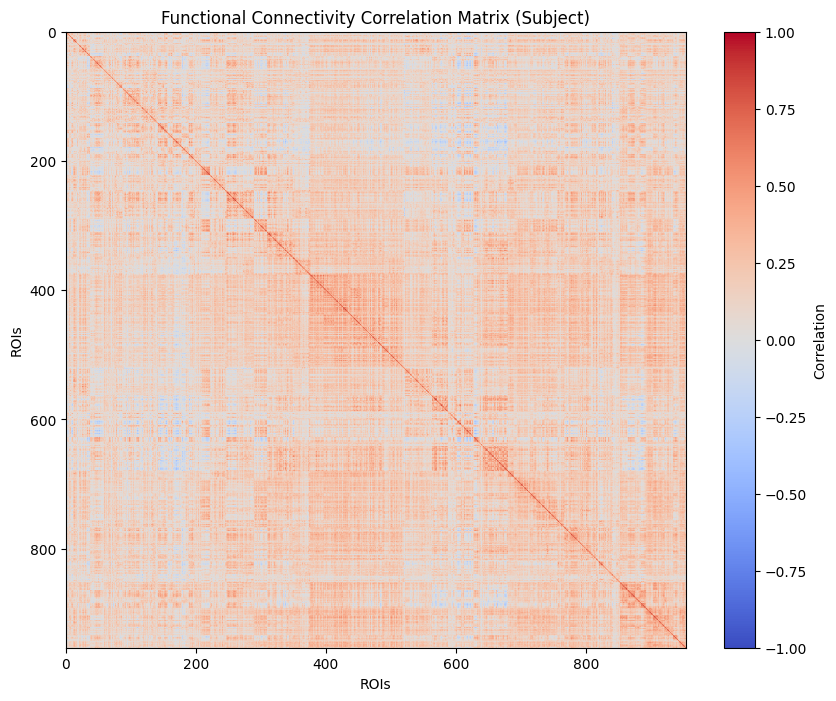

In [12]:
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.title('Functional Connectivity Correlation Matrix (Subject)')
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()

### Constructing Network for all of the subject

In [13]:
# First let's see how many subjects are there in the dataset
subject_files = [file for file in os.listdir(rois_folder) if file.startswith('tseries')]
len(subject_files)

194

In [14]:
# Calculate the average correlation matrix for all subjects
# Handling NaN values and Constant ROIs (Removing them)

combined_correlation_matrix = np.zeros((954, 954))
time_series_files = [f for f in os.listdir(rois_folder) if f.endswith('.mat')]
problematic_files = []

# Process each subject's time series data
for file_name in time_series_files:
    subject_path = os.path.join(rois_folder, file_name)
    try:
        
        mat_data = sio.loadmat(subject_path)
        
        # Extract the time series data
        if 'tseries' in mat_data:
            time_series_data = mat_data['tseries']
            
            # Remove constant ROIs (standard deviation = 0)
            valid_rois = np.std(time_series_data, axis=0) > 0
            filtered_time_series = time_series_data[:, valid_rois]
            
            # Calculate the correlation matrix for the subject
            if filtered_time_series.shape[1] > 1:  # Ensure there are valid ROIs
                subject_correlation_matrix = np.corrcoef(filtered_time_series.T)
                combined_correlation_matrix += subject_correlation_matrix
            else:
                problematic_files.append(file_name)
        else:
            problematic_files.append(file_name)
    except Exception as e:
        problematic_files.append(file_name)

# Calculate the average correlation matrix
num_processed_subjects = len(time_series_files) - len(problematic_files)
combined_correlation_matrix /= num_processed_subjects


# Handle NaN values in the combined correlation matrix
cleaned_correlation_matrix = np.nan_to_num(combined_correlation_matrix)

# Calculate the threshold based on mean + 2 standard deviation
correlation_values = cleaned_correlation_matrix[np.triu_indices_from(cleaned_correlation_matrix, k=1)]
correlation_mean = np.mean(correlation_values)
correlation_std = np.std(correlation_values)
# threshold = correlation_mean + correlation_std
threshold = correlation_mean + 2.5 * correlation_std # stricter threshold for better results

# Apply the threshold
thresholded_matrix = np.where(
    np.abs(cleaned_correlation_matrix) >= threshold, cleaned_correlation_matrix, 0
)

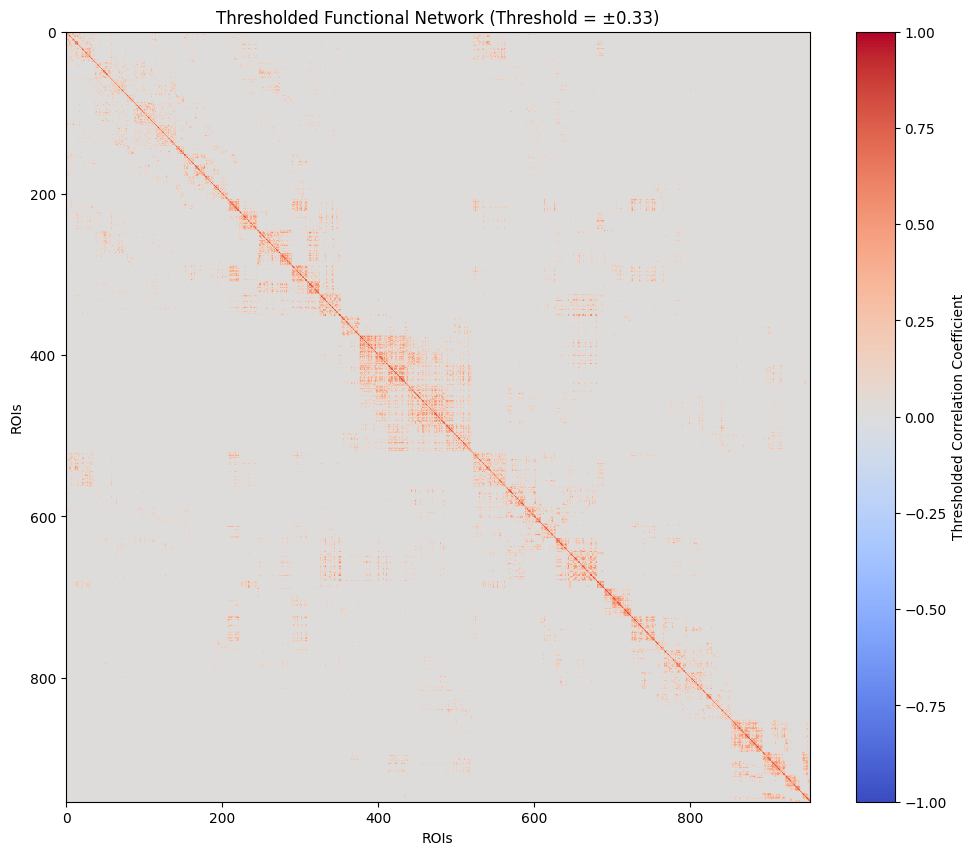

In [15]:
# Visualize the thresholded matrix
plt.figure(figsize=(12, 10))
plt.imshow(thresholded_matrix, aspect='auto', cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Thresholded Correlation Coefficient')
plt.title(f'Thresholded Functional Network (Threshold = ±{threshold:.2f})')
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()

In [16]:
print(f"Number of subjects processed: {num_processed_subjects}")
print(f"Number of problematic files: {len(problematic_files)}")
print(f"Chosen threshold: ±{threshold:.2f}")

Number of subjects processed: 171
Number of problematic files: 24
Chosen threshold: ±0.33


We can observe that we only have 171 subjects, 23 subjects have been removed, becuase of handling NaNs and Constant ROIs (See the Explanation below)

In [17]:
# Updated justification for the threshold
threshold_justification = {
    "mean_correlation": correlation_mean,
    "std_deviation": correlation_std,
    "chosen_threshold": threshold,
    "rationale": "Correlations above mean + 1 standard deviation capture significant interactions while reducing noise."
}
threshold_justification

{'mean_correlation': np.float64(0.1195105906649908),
 'std_deviation': np.float64(0.08577004878723299),
 'chosen_threshold': np.float64(0.33393571263307326),
 'rationale': 'Correlations above mean + 1 standard deviation capture significant interactions while reducing noise.'}

**Explanation**

To calculate the **Threshold Combined Average Correlation Matrix**, we first created individual correlation matrices for each subject. These matrices were created by calculating pairwise correlations between the time series data of all regions of interest (ROIs) of the brain. Before computing the correlations, we addressed potential issues such as ROIs with zero variance (constant time series) that could lead to invalid computations. Such ROIs were identified and excluded from the analysis to ensure meaningful results. After processing each subject, we combined all valid correlation matrices by summing them and then dividing by the total number of subjects to calculate the **average correlation matrix**, which represents the collective functional connectivity in the group.

Next, we applied a threshold to this combined matrix to focus on the most significant connections. The threshold was calculated as the sum of the mean and one standard deviation of the correlation values in the combined matrix. This approach ensured that only correlations stronger than the average (plus natural variation) were considered. Finally, we set all values below the threshold to zero. The result is the **Thresholded Combined Average Correlation Matrix**, which highlights meaningful and robust connections between brain regions, while filtering out weaker, potentially noisy relationships.

**Threshold Calculation**

Once we have obtained the combined correlation matrix, we apply a threshold to focus on significant links and remove noise.

**Process:**
**Analyze the correlation distribution:**
- We calculated the mean and standard deviation of all pairwise correlations in the combined matrix.

**The threshold was defined as follows:**
Threshold = mean + 2.5 * standard deviation

This captures links that are stronger than average by including correlations that are above one standard deviation from the mean.

**Apply the threshold value:**
- Correlations with absolute values below the threshold were set to zero.
- In this step, weaker links were removed, leaving only significant relationships between ROIs.

**Objective of thresholding**
1. Retain only the strongest and most significant connections in the network.
2. Filter out weak correlations that might represent noise or non-relevant interactions.
3. Ensures that the resulting graph highlights meaningful brain connectivity patterns while avoiding excessive sparsity or density.

**Was Cleaning NaNs and Removing Constant ROIs, a correct approach?**

**1. Cleaning up NaNs in the combined matrix**

What we have done:
- After we calculated the combined average correlation matrix, we replaced all NaN values with 0.

Why this is correct:
Source of NaNs: NaN values in the combined matrix can arise from:
- ROIs with constant time series that result in division by zero during normalization in the correlation calculation.
- Subjects with missing or invalid data for certain ROIs.
- Effects of NaNs: If left untreated, NaN values can invalidate the results.
- Use of zero: By replacing NaN values with 0, we treated these compounds as nonexistent, which is reasonable because NaN indicates the absence of meaningful data.

**2. Removing Constant ROIs**

What we did:
- Before calculating correlations, we identified ROIs with constant time series (zero variance) for each subject and excluded them.

Why this is correct:
- What constant ROIs represent: A constant time series has no meaningful variation, and its correlation with other ROIs is undefined (division by zero). These ROIs are often caused by artifacts, poor signal quality or pre-processing issues.

Why exclusion is necessary:
- Including constant ROIs would result in invalid or misleading correlations.
- Removing them ensures that the analysis only focuses on ROIs with meaningful activity.

Here we can see that the number of subjects, after handling the NaNs and Constant ROIs, we have 171 subjects remaining.

## Graph Construction from the Thresholded Combined Average Correlation Matrix 

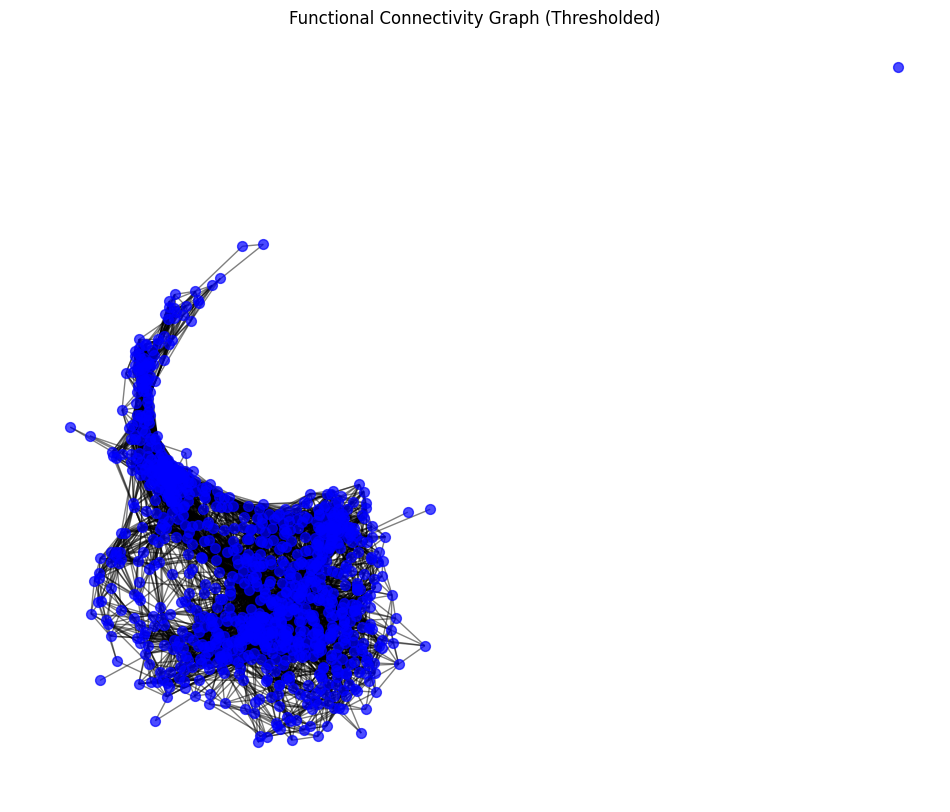

In [18]:
G = nx.Graph()

num_rois = thresholded_matrix.shape[0]
G.add_nodes_from(range(num_rois))  # Add nodes labeled 0 to num_rois-1

# Only consider the upper triangular part of the matrix to avoid duplicate edges
for i in range(num_rois):
    for j in range(i + 1, num_rois):
        weight = thresholded_matrix[i, j]
        if weight != 0:  # Include only significant edges
            G.add_edge(i, j, weight=weight)

# Visualize the functional connectivity graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Functional Connectivity Graph (Thresholded)')
plt.axis('off')
plt.show()

In [19]:
print(f"Number of nodes (ROIs): {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes (ROIs): 954
Number of edges: 12590


We can observe that we have an isolated node in the graph, it is a reasonable step to remove this node, since it is not meaningful

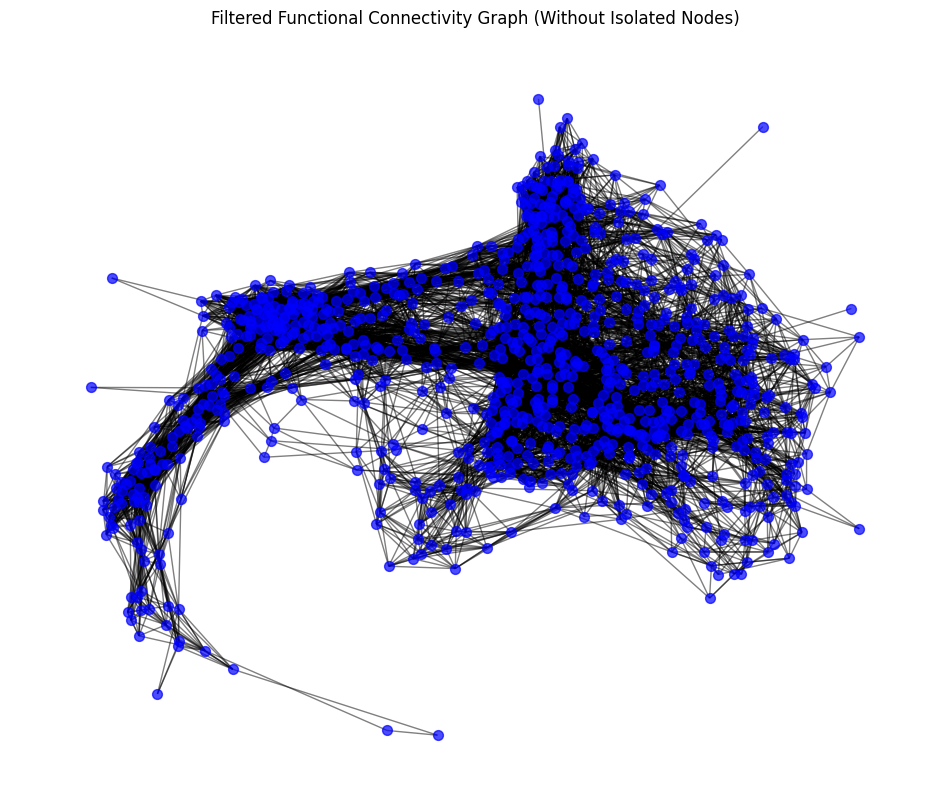

In [20]:
# Removing the isolated nodes and reconstructing the graph again


# Identify connected components
connected_components = list(nx.connected_components(G))

# Filter out components with only one node
non_isolated_components = [comp for comp in connected_components if len(comp) > 1]

# Reconstruct the graph without isolated nodes
nodes_to_keep = set().union(*non_isolated_components)  # Union of all non-isolated components
G_filtered = G.subgraph(nodes_to_keep).copy()

# Visualize the filtered graph
plt.figure(figsize=(12, 10))
pos_filtered = nx.spring_layout(G_filtered, seed=42)
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=50, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_filtered, pos_filtered, alpha=0.5)
plt.title('Filtered Functional Connectivity Graph (Without Isolated Nodes)')
plt.axis('off')
plt.show()

In [21]:
# save this thresholded matrix to a csv file
thresholded_matrix_file = os.path.join(inner_folder, 'thresholded_matrix.csv')
np.savetxt(thresholded_matrix_file, thresholded_matrix, delimiter=',')
print('Thresholded matrix saved to:', thresholded_matrix_file)

Thresholded matrix saved to: /Users/syednaqvi/university_data/Connectomics - Lab//Connectomics/Project/Datasets/extracted_rois_1000_beijing/rois_1000_beijing/thresholded_matrix.csv


**Network Metrics / Network Statistics**

In [ ]:
# # Basic Metrics
# num_nodes = G.number_of_nodes()  
# num_edges = G.number_of_edges()  
# density = nx.density(G)
# average_clustering = nx.average_clustering(G, weight='weight')
# degree_centrality = nx.degree_centrality(G)
# betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# # Step 2: Node-Level Metrics
# # Convert degree centrality and betweenness centrality to sorted lists
# degree_centrality_sorted = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
# betweenness_centrality_sorted = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# # Step 3: Average Shortest Path Length
# if nx.is_connected(G):
#     # Calculate the average shortest path length for a connected graph
#     avg_shortest_path_length = nx.average_shortest_path_length(G, weight='weight')
#     avg_shortest_path_result = f"Average Shortest Path Length: {avg_shortest_path_length:.4f}"
# else:
#     # If the graph is not connected, calculate for each connected component
#     connected_components = list(nx.connected_components(G))
#     avg_shortest_path_lengths = []
    
#     for component in connected_components:
#         subgraph = G.subgraph(component)
#         length = nx.average_shortest_path_length(subgraph, weight='weight')
#         avg_shortest_path_lengths.append(length)
    
#     # Report the results
#     overall_avg_shortest_path = np.mean(avg_shortest_path_lengths)
#     avg_shortest_path_result = "Graph is disconnected.\n" \
#         "Average Shortest Path Length per Component:\n" + \
#         "\n".join([f" - Component {i + 1}: {length:.4f}" for i, length in enumerate(avg_shortest_path_lengths)]) + \
#         f"\nOverall Average Shortest Path Length: {overall_avg_shortest_path:.4f}"

# # Step 4: Summary of Metrics
# print("Network Metrics:")
# print(f"Number of Nodes (ROIs): {num_nodes}")
# print(f"Number of Edges: {num_edges}")
# print(f"Density: {density:.4f}")
# print(f"Average Clustering Coefficient: {average_clustering:.4f}")
# print(avg_shortest_path_result)

# # Top 5 Nodes by Degree Centrality
# print("Top 5 Nodes by Degree Centrality:")
# for node, centrality in degree_centrality_sorted[:5]:
#     print(f"Node {node}: {centrality:.4f}")

# # Top 5 Nodes by Betweenness Centrality
# print("Top 5 Nodes by Betweenness Centrality:")
# for node, centrality in betweenness_centrality_sorted[:5]:
#     print(f"Node {node}: {centrality:.4f}")

# # Step 5: Visualization of Degree Distribution
# degrees = [val for (node, val) in G.degree()]
# plt.figure(figsize=(8, 6))
# plt.hist(degrees, bins=30, edgecolor='black', alpha=0.7)
# plt.title('Degree Distribution of the Network')
# plt.xlabel('Degree')
# plt.ylabel('Frequency')
# plt.show()

Filtered Network Metrics:
Number of Nodes (ROIs): 953
Number of Edges: 12590
Density: 0.0278
Average Clustering Coefficient: 0.2640
Average Shortest Path Length: 1.4343
Top 5 Nodes by Degree Centrality:
Node 431: 0.0809
Node 430: 0.0798
Node 444: 0.0798
Node 481: 0.0798
Node 421: 0.0788
Top 5 Nodes by Betweenness Centrality:
Node 469: 0.0499
Node 649: 0.0393
Node 410: 0.0333
Node 579: 0.0322
Node 710: 0.0318


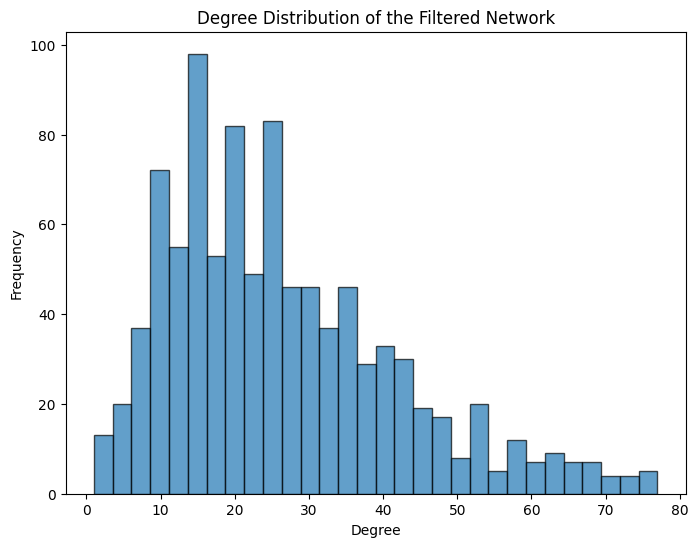

In [22]:
# Basic Metrics
num_nodes = G_filtered.number_of_nodes()  
num_edges = G_filtered.number_of_edges()  
density = nx.density(G_filtered)
average_clustering = nx.average_clustering(G_filtered, weight='weight')
degree_centrality = nx.degree_centrality(G_filtered)
betweenness_centrality = nx.betweenness_centrality(G_filtered, weight='weight')

# Node-Level Metrics
# Convert degree centrality and betweenness centrality to sorted lists
degree_centrality_sorted = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
betweenness_centrality_sorted = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Average Shortest Path Length
if nx.is_connected(G_filtered):
    # Calculate the average shortest path length for a connected graph
    avg_shortest_path_length = nx.average_shortest_path_length(G_filtered, weight='weight')
    avg_shortest_path_result = f"Average Shortest Path Length: {avg_shortest_path_length:.4f}"
else:
    # If the graph is not connected, calculate for each connected component
    connected_components = list(nx.connected_components(G_filtered))
    avg_shortest_path_lengths = []
    
    for component in connected_components:
        subgraph = G_filtered.subgraph(component)
        length = nx.average_shortest_path_length(subgraph, weight='weight')
        avg_shortest_path_lengths.append(length)
    
    # Report the results
    overall_avg_shortest_path = np.mean(avg_shortest_path_lengths)
    avg_shortest_path_result = "Graph is disconnected." \
        "Average Shortest Path Length per Component:" + \
        "\n".join([f" - Component {i + 1}: {length:.4f}" for i, length in enumerate(avg_shortest_path_lengths)]) + \
        f"Overall Average Shortest Path Length: {overall_avg_shortest_path:.4f}"

# Summary of Metrics
print("Filtered Network Metrics:")
print(f"Number of Nodes (ROIs): {num_nodes}")
print(f"Number of Edges: {num_edges}")
print(f"Density: {density:.4f}")
print(f"Average Clustering Coefficient: {average_clustering:.4f}")
print(avg_shortest_path_result)

# Top 5 Nodes by Degree Centrality
print("Top 5 Nodes by Degree Centrality:")
for node, centrality in degree_centrality_sorted[:5]:
    print(f"Node {node}: {centrality:.4f}")

# Top 5 Nodes by Betweenness Centrality
print("Top 5 Nodes by Betweenness Centrality:")
for node, centrality in betweenness_centrality_sorted[:5]:
    print(f"Node {node}: {centrality:.4f}")

# Visualization of Degree Distribution
degrees = [val for (node, val) in G_filtered.degree()]
plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=30, edgecolor='black', alpha=0.7)
plt.title('Degree Distribution of the Filtered Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Investigating the Average shortest path Length Nnumber that we are seeing above

# 1. Network Density
density = nx.density(G_filtered)
print(f"Network Density: {density:.4f}")

Network Density: 0.0278


In [24]:
# 2. Component Analysis and ASPL
if nx.is_connected(G_filtered):
    avg_shortest_path_length = nx.average_shortest_path_length(G_filtered, weight='weight')
    print(f"Graph is connected. Average Shortest Path Length: {avg_shortest_path_length}")
else:
    # Analyze largest connected component
    largest_component = max(nx.connected_components(G_filtered), key=len)
    largest_subgraph = G_filtered.subgraph(largest_component)
    avg_shortest_path_length = nx.average_shortest_path_length(largest_subgraph, weight='weight')
    print(f"Graph is disconnected. Largest Component ASPL: {avg_shortest_path_length}")

Graph is connected. Average Shortest Path Length: 1.434324225428165


In [25]:
# 3. Clustering Coefficient
average_clustering = nx.average_clustering(G_filtered, weight='weight')
print(f"Average Clustering Coefficient: {average_clustering:.4f}")

Average Clustering Coefficient: 0.2640


In [ ]:
self_loops = list(nx.selfloop_edges(G_filtered))
print(f"Number of self-loops: {len(self_loops)}")

### Null Models

#### 1. Binary Undirected (BU) Null Model

In [ ]:
def generate_bu_null_model(observed_graph):


    num_nodes = observed_graph.number_of_nodes()
    num_edges = observed_graph.number_of_edges()

    # Create a random graph with the same number of nodes and edges
    bu_null_model = nx.gnm_random_graph(num_nodes, num_edges)

    return bu_null_model


#### 2. Degreee-Preserving Randomization

In [ ]:
def generate_degree_preserving_randomization(observed_graph, num_iterations=10):
    
    #Randomize the graph while preserving the degree distribution using edge swaps.

    randomized_graph = observed_graph.copy()

    for _ in range(num_iterations):
        # Select two random edges
        edges = list(randomized_graph.edges())
        if len(edges) < 2:
            break
        (u, v) = random.choice(edges)
        (x, y) = random.choice(edges)

        # Ensure no self-loops or duplicate edges
        if len(set([u, v, x, y])) == 4 and not randomized_graph.has_edge(u, y) and not randomized_graph.has_edge(x, v):
            randomized_graph.remove_edge(u, v)
            randomized_graph.remove_edge(x, y)
            randomized_graph.add_edge(u, y)
            randomized_graph.add_edge(x, v)

    return randomized_graph


Compute Metrics and Compare with G_filtered

In [ ]:
def compute_network_metrics(graph):

    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    density = nx.density(graph)
    avg_clustering = nx.average_clustering(graph, weight='weight')
    
    if nx.is_connected(graph):
        aspl = nx.average_shortest_path_length(graph, weight='weight')
    else:
        # Calculate ASPL for the largest component if the graph is disconnected
        largest_component = max(nx.connected_components(graph), key=len)
        subgraph = graph.subgraph(largest_component)
        aspl = nx.average_shortest_path_length(subgraph, weight='weight')
    
    return {
        "Number of Nodes": num_nodes,
        "Number of Edges": num_edges,
        "Density": density,
        "Average Clustering Coefficient": avg_clustering,
        "Average Shortest Path Length": aspl
    }

# Compare Observed Network with Null Models
def compare_with_null_models(observed_graph, num_null_models=100):

    observed_metrics = compute_network_metrics(observed_graph)

    # Null models metrics
    bu_metrics = []
    degree_preserving_metrics = []

    for _ in range(num_null_models):
        # Binary Undirected (BU) Null Model
        bu_null = generate_bu_null_model(observed_graph)
        bu_metrics.append(compute_network_metrics(bu_null))

        # Degree-Preserving Randomization
        dp_null = generate_degree_preserving_randomization(observed_graph, num_iterations=10)
        degree_preserving_metrics.append(compute_network_metrics(dp_null))

    return observed_metrics, bu_metrics, degree_preserving_metrics


In [ ]:
# Visualize comparison of a specific metric between observed graph and null models.
def visualize_comparison(observed_metrics, bu_metrics, dp_metrics, metric_name):

    observed_value = observed_metrics[metric_name]
    bu_values = [m[metric_name] for m in bu_metrics]
    dp_values = [m[metric_name] for m in dp_metrics]

    plt.figure(figsize=(10, 6))
    plt.hist(bu_values, bins=30, alpha=0.5, label='BU Null Model', color='blue')
    plt.hist(dp_values, bins=30, alpha=0.5, label='Degree-Preserving Null Model', color='green')
    plt.axvline(observed_value, color='red', linestyle='--', label='Observed')
    plt.title(f"Comparison of {metric_name}")
    plt.xlabel(metric_name)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


In [ ]:
observed_metrics, bu_metrics, dp_metrics = compare_with_null_models(G_filtered, num_null_models=100)

In [ ]:
visualize_comparison(observed_metrics, bu_metrics, dp_metrics, "Density")
visualize_comparison(observed_metrics, bu_metrics, dp_metrics, "Average Clustering Coefficient")
visualize_comparison(observed_metrics, bu_metrics, dp_metrics, "Average Shortest Path Length")

**Interpretation**

**1. Comparison of Density**

- Observed value: The red dashed line shows the density of the observed graph.
- BU Null Model Distribution: The density of the Binary Undirected Null Model is much higher than the density of the observed graph.
- Degree-Preserving Null Model Distribution: the density matches the observed graph (almost overlapping).

**Insights:**

- The BU model places edges randomly, resulting in a denser network since there are no constraints on edge placement.
- The Degree-Preserving Null Model preserves the degree distribution so that its density exactly matches the density of the observed graph.

In general, The density of the observed graph is expected based on its degree distribution and matches the null model.

**2. Average Clustering Coefficient**

- Observed value: The observed clustering coefficient (red dashed line) is significantly higher than both null models.
- BU null model distribution: The clustering coefficients are close to zero, as random graphs typically exhibit very low clustering.
- Degree-preserving null model distribution: clustering is higher than for the BU model, but still much lower than the observed value.

**Insights:**
- The observed graph has a significantly higher clustering coefficient compared to both null models, indicating the presence of strong local connectivity and modular organization.
- The degree-preserving null model makes it clear that the observed clustering is not simply due to the degree distribution, but results from specific edge arrangements.

Overall, The observed graph shows a meaningful local clustering that probably reflects biological processes in the brain network.

**3. Average shortest path length (ASPL)**

- Observed value: The observed ASPL is shorter than both null models.
- BU null model distribution: ASPL values are higher, indicating inefficient global connectivity due to random edge placement.
- Degree-Preserving Null Model Distribution: ASPL values are closer to the observed graph, but still slightly higher.

**Insights:**
- The observed graph has a shorter ASPL, indicating more efficient global connectivity than random networks.
- The degree-preserving null model suggests that part of this efficiency is due to the observed degree distribution. However, the observed ASPL, which is lower than that of the degree-preserving model, suggests that the non-random placement of edges further optimizes global connectivity.

So, The observed network is optimized for efficient global information transfer, consistent with the small-world property of brain networks.

**Conclusion**

**BU Model Insights:**

- The BU null model illustrates that the observed graph is anything but random, with significantly higher clustering and shorter path lengths.
- It shows that the structure of the observed graph is highly non-random and likely reflects meaningful biological organization.

**Insights into the degree-preserving model:**

- By preserving the degree distribution, this model isolates the effects of specific edge arrangements.
- The results confirm that the clustering and efficiency of the observed network are not only due to the degree distribution, but to specific patterns of connectivity.

**Biological interpretation:**

- High clustering: Indicates the presence of a modular or community structure indicative of specialized processing regions in the brain.
- Short ASPL: Indicates efficient communication between regions, consistent with the small-world topology often observed in brain networks.

**RQ.1 How does the global efficiency of functional brain networks differ between ADHD subtypes (Combined, Inattentive, and Hyperactive/Impulsive)?**

**1. Global Efficiency Calculation**

Global efficiency is a measure of how efficiently information is exchanged across the entire network. It is the average of the inverse shortest path lengths between all pairs of nodes.

**Relevance to ADHD**
- ADHD is associated with disrupted long-range communication in the brain. Global efficiency is a direct measure of this disruption.
- Lower global efficiency in ADHD subtypes might indicate less efficient integration between distant brain regions, which could explain symptoms like attention deficits and impulsivity.

In [ ]:
# Get a list of all edges with their attributes
edge_data = list(G.edges(data=True))

# Print the first few edges to inspect their attributes
print("Sample edges with attributes:", edge_data[:5])

In [ ]:
# For each subject, compute the global efficiency of their functional brain network

def compute_global_efficiency_weighted(graph):

    # Initialize efficiency
    efficiency = 0.0

    # Iterate through all pairs of nodes
    nodes = list(graph.nodes)
    num_nodes = len(nodes)
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if u != v:  # Exclude self-loops
                try:
                    # Compute shortest path length considering weights
                    shortest_path_length = nx.shortest_path_length(graph, source=u, target=v, weight='weight')
                    efficiency += 1 / shortest_path_length
                except nx.NetworkXNoPath:
                    # If no path exists, skip
                    pass

    # Normalize by the number of possible pairs
    return efficiency / (num_nodes * (num_nodes - 1))


# Compute global efficiency for the observed graph
observed_global_efficiency = compute_global_efficiency_weighted(G_filtered)
print(f"Observed Global Efficiency: {observed_global_efficiency:.4f}")

# Compute global efficiency for the null models
bu_global_efficiencies = [compute_global_efficiency_weighted(g) for g in bu_metrics]
dp_global_efficiencies = [compute_global_efficiency_weighted(g) for g in dp_metrics]

# Visualize the distribution of global efficiency
plt.figure(figsize=(10, 6))
plt.hist(bu_global_efficiencies, bins=30, alpha=0.5, label='BU Null Model', color='blue')
plt.hist(dp_global_efficiencies, bins=30, alpha=0.5, label='Degree-Preserving Null Model', color='green')
plt.axvline(observed_global_efficiency, color='red', linestyle='--', label='Observed')
plt.title("Comparison of Global Efficiency (Weighted)")
plt.xlabel("Global Efficiency")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**2. Group Comparisons**
- ANOVA (Parametric Test)

In [ ]:
# Loading the phenotypic data for all subjects

#file paths
file_paths = [os.path.join(inner_folder, f) for f in os.listdir(inner_folder) if f.startswith('Peking')]

# Load the phenotypic data for all subjects
phenotypic_data = pd.concat([pd.read_csv(f) for f in file_paths])

# Display the first few rows of the combined phenotypic data
phenotypic_data.head()


**RQ.2 Are there specific hub regions in the functional brain networks of ADHD patients that are more susceptible to altered connectivity compared to controls, and how do these hubs relate to ADHD symptom severity?**

**Analysis:**
**1. dentify Hub Nodes**
Hubs are nodes with high centrality, such as:
    - Degree centrality: Nodes with the most connections.
    - Betweenness centrality: Nodes that act as bridges between other nodes.

- Compute centrality measures (degree, betweenness, eigenvector) for each node in the network.
- Identify the top nodes (e.g., top 10%) as hubs.

**2. Network Based Statistical Analysis (NBS)**
- Using NBS to detect subnetworks or regions where connectivity differs significantly between groups (ADHD vs. controls).
- Identify specific hubs in these subnetworks that might show altered connectivity. 

In [ ]:
# Load the results and merge with phenotype data for statistical analysis
metrics_df = pd.read_csv(output_file_path)
metrics_df = metrics_df.merge(phenotype_data[["ScanDir ID", "DX"]], left_on="Subject_ID", right_on="ScanDir ID")
metrics_df.drop(columns=["ScanDir ID"], inplace=True)

# Example: Statistical analysis of Global Efficiency
from scipy.stats import ttest_ind

group_combined = metrics_df[metrics_df["DX"] == 1]
group_hyperactive = metrics_df[metrics_df["DX"] == 3]

stat, p_value = ttest_ind(group_combined["Global_Efficiency"], group_hyperactive["Global_Efficiency"])
print(f"T-test results for Global Efficiency between Combined and Hyperactive/Impulsive:")
print(f"t-statistic: {stat}, p-value: {p_value}")